# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Configurar o estilo do Seaborn
sns.set(style="whitegrid")

In [2]:
sinasc = pd.read_csv('sinasc_RO_2019.csv')
sinasc.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [3]:
apgar = {
    0: 'asfixia grave',
    1: 'asfixia grave',
    2: 'asfixia grave',
    3: 'asfixia grave',
    4: 'asfixia moderada',
    5: 'asfixia moderada',
    6: 'asfixia leve',
    7: 'asfixia leve',
    8: 'normal',
    9: 'normal',
    10: 'normal'    
}
sinasc['apgar5_categ'] = sinasc['APGAR5'].map(apgar)
sinasc.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,apgar5_categ
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,normal
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal


In [4]:
sinasc['apgar5_categ'].value_counts()

apgar5_categ
normal              26463
asfixia leve          320
asfixia grave          74
asfixia moderada       68
Name: count, dtype: int64

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

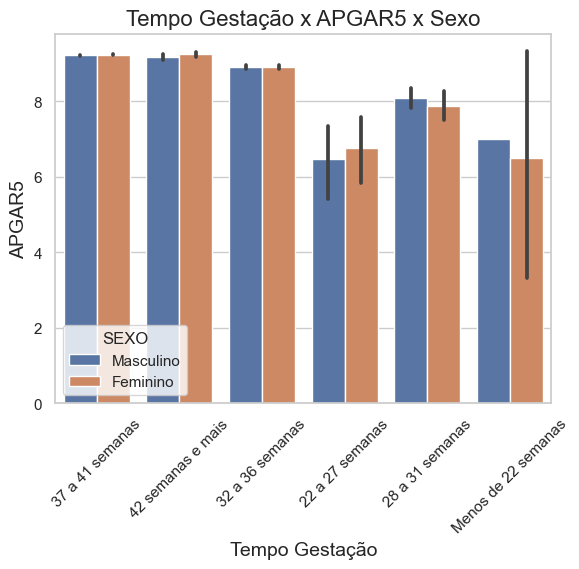

In [5]:
sns.barplot(data=sinasc, y='APGAR5', x='GESTACAO', hue='SEXO')
plt.xticks(rotation=45)
plt.title("Tempo Gestação x APGAR5 x Sexo", fontsize=16)
plt.xlabel("Tempo Gestação", fontsize=14)
plt.ylabel("APGAR5", fontsize=14)
plt.show()

In [6]:
plt.close('all')

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [7]:
tab_cruzada = pd.crosstab(sinasc['APGAR5'], sinasc['GESTACAO'])
tab_cruzada

GESTACAO,22 a 27 semanas,28 a 31 semanas,32 a 36 semanas,37 a 41 semanas,42 semanas e mais,Menos de 22 semanas
APGAR5,,,,,,
0.0,7,0,2,5,1,1
1.0,0,0,2,20,0,0
2.0,8,2,2,3,0,1
3.0,6,1,2,5,0,0
4.0,1,5,8,7,0,0
5.0,0,7,11,21,1,0
6.0,2,7,17,45,1,0
7.0,10,11,56,151,5,1
8.0,24,61,362,1417,44,0


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [8]:
percentuais_linha = tab_cruzada.div(tab_cruzada.sum(axis=1), axis=0) * 100
percentuais_linha

GESTACAO,22 a 27 semanas,28 a 31 semanas,32 a 36 semanas,37 a 41 semanas,42 semanas e mais,Menos de 22 semanas
APGAR5,,,,,,
0.0,43.750000,0.000000,12.500000,31.250000,6.250000,6.250000
1.0,0.000000,0.000000,9.090909,90.909091,0.000000,0.000000
2.0,50.000000,12.500000,12.500000,18.750000,0.000000,6.250000
3.0,42.857143,7.142857,14.285714,35.714286,0.000000,0.000000
4.0,4.761905,23.809524,38.095238,33.333333,0.000000,0.000000
5.0,0.000000,17.500000,27.500000,52.500000,2.500000,0.000000
6.0,2.777778,9.722222,23.611111,62.500000,1.388889,0.000000
7.0,4.273504,4.700855,23.931624,64.529915,2.136752,0.427350
8.0,1.257862,3.197065,18.972746,74.266247,2.306080,0.000000


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

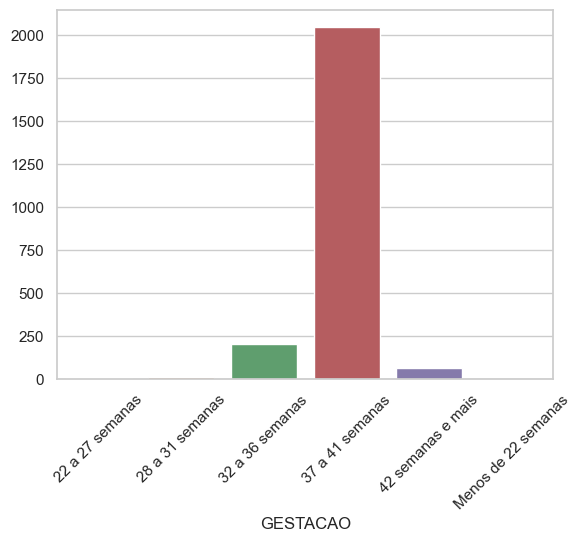

In [9]:
sns.barplot(data=tab_cruzada, errorbar=None)
plt.xticks(rotation=45)
plt.show()

O gráfico mostra que a quantidade de partos com menos de 37 semanas é baixa em relação aos partos com 37 semanas ao mais. Considerando que os partos prematuros são a excesão, podemos dizer que o gráfico reflete essa situação.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

<Axes: xlabel='APGAR5', ylabel='PESO'>

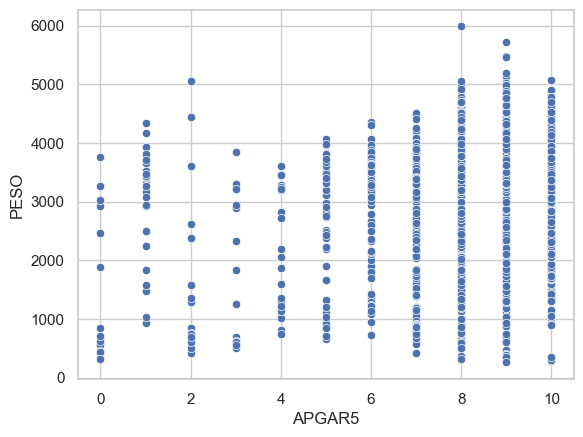

In [10]:
plt.close('all')
sns.scatterplot(data=sinasc, x='APGAR5', y='PESO')

<Axes: xlabel='APGAR5', ylabel='PESO'>

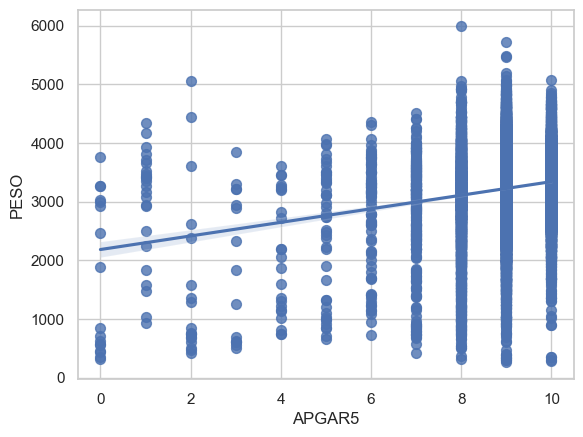

In [11]:
plt.close('all')
sns.regplot(data=sinasc, x='APGAR5', y='PESO', scatter_kws={'s': 50} )

In [12]:
correlacao = sinasc['APGAR5'].corr(sinasc['PESO'])
correlacao

0.16821001802434477

É possível perceber que existe uma pequena correlação positiva entre o APGAR5 e o PESO do bebê ao nascer.